In [1]:
import numpy as np
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
import plotly.express as px

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_excel('MilanoIndeed.xlsx')
dati = data.copy()
dati.head(10)

,JobTitle,Company,Location,Description,Ratings,Job_types,Salary,Pubblication_Date
0,S&P Global Ratings - Non-Bank Financial Instit...,S&P Global,20121 Milano,Strong communication and interpersonal skills ...,NaN,NaN,NaN,30+ giorni fa
1,NOW – Data Analyst,Sky,"Milano, Lombardia","Solid competence in data mining, extraction an...","3,4",Tempo pieno,NaN,8 giorni fa
2,Data Analyst,Sec Newgate Italia,20125 Milano,Design clear and automated reports to democrat...,NaN,NaN,35.000 € - 45.000 € all'anno,2 giorni fa
3,Technical Analyst,OverIT S.p.A,Da remoto in Italia,Knowledge of databases in terms of data struct...,"4,3",Tempo pieno,NaN,Ultimo accesso oggi
4,Summer Business Analyst Intern,McKinsey & Company,"Milano, Lombardia",You’ll work in teams of typically 3 – 5 consul...,NaN,Tirocinio formativo/stage,NaN,30+ giorni fa
5,Stage | Data Analyst,CPM Italy,Da remoto in 20144 Milano,Ci prendiamo cura dei maggiori brand mondiali ...,"2,5",Tirocinio formativo/stage\n+1,NaN,16 giorni fa
6,IT Junior Business Analyst,Prada,"Milano, Lombardia",Passionate and knowledgeable about data analys...,"3,9",NaN,NaN,23 giorni fa
7,JUNIOR DATA ANALYST,Deloitte,"Milano, Lombardia",Analisi dati su basi dati relazionali e NoSQL;...,"3,9",Tirocinio formativo/stage,NaN,30+ giorni fa
8,Data Warehouse Analyst,FinecoBank,"Da remoto in Milano, Lombardia",Promuove la razionalizzazione in azienda di tu...,"4,0",Tempo indeterminato,NaN,1 giorno fa
9,Data Analyst,M.C. Engineering Srl,Da remoto in 20100 Milano,Gradita conoscenza di Power BI e/o Looker Stud...,"3,3",NaN,NaN,30+ giorni fa


In [3]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   JobTitle           15 non-null     object
 1   Company            15 non-null     object
 2   Location           15 non-null     object
 3   Description        15 non-null     object
 4   Ratings            11 non-null     object
 5   Job_types          8 non-null      object
 6   Salary             1 non-null      object
 7   Pubblication_Date  15 non-null     object
dtypes: object(8)
memory usage: 1.1+ KB


# See the most used words for job descriptions

In [4]:
# Create a text file with only short description for every company
descrizioni = dati['Description']
with open('descrizioni.txt', 'w') as file:
    for desc in dati['Description']:
        file.write(desc + '\n')

In [5]:
# Function for replace special characters
def strip_puntuactions(line):
    """Function for replacing special characters %^&* to empty string"""
    for character in string.punctuation:
        line = line.replace(character, "")
    return line  


### Exclude special characters and stop words in English and Italian

In [6]:
# Get italian and English stop words
filepath = "descrizioni.txt"

stop_words_it = stopwords.words('italian')
stop_words_eng = stopwords.words('english')

stop_words = stop_words_it.copy()
stop_words.extend(stop_words_eng)

filtered_list = []

with open(filepath, 'r') as fi:
    #exclude special characters
    for line in fi:
        line = strip_puntuactions(line)
        words = line.split()
        
        # exclude stop words
        for word in words:
            word = word.lower()
            if word.lower() not in stop_words:
                filtered_list.append(word)

In [7]:
# Word Count and Frequencies
word_count = {}


for line in filtered_list:
    line = strip_puntuactions(line)
    words = line.split()
    
    for word in words:
        word = word.lower()
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1
            
            
list(word_count.keys())[:30]

['strong',
 'communication',
 'interpersonal',
 'skills',
 'represent',
 'sp',
 'primary',
 'analyst',
 'meetings',
 'willing',
 'travel',
 'sometimes',
 'short',
 'notice',
 'solid',
 'competence',
 'data',
 'mining',
 'extraction',
 'processing',
 'use',
 'different',
 'analysis',
 'visualization',
 'techniques',
 'exploration…',
 'design',
 'clear',
 'automated',
 'reports']

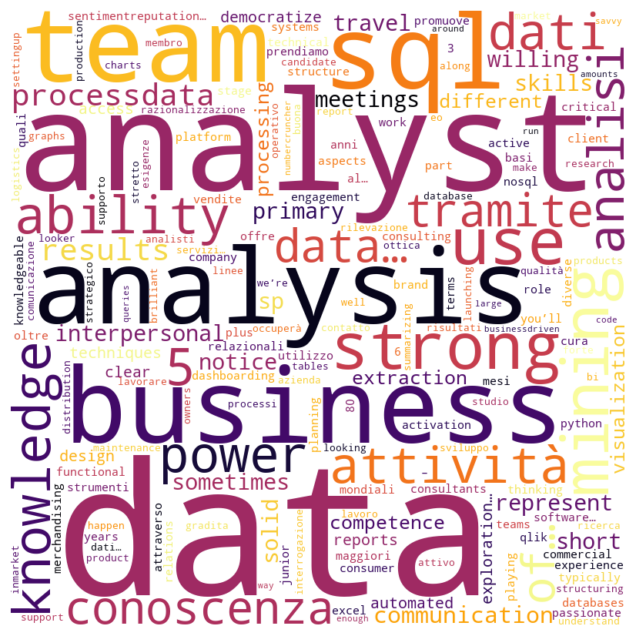

In [8]:
# Word plot
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def create_word_cloud(word_count):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno').generate_from_frequencies(word_count)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


# word_count is the dictionary of word frequency
create_word_cloud(word_count)


In [16]:
# Search up for programming languages

# opening the file in read mode
my_file = open("programming_visualiz_tools.txt", "r")
  
# reading the file
data = my_file.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
programming_languages = data.split("\n")
# print(programming_languages)
my_file.close()

filtered_list = []

with open(filepath, 'r') as fi:
    #exclude special characters
    for line in fi:
        line = strip_puntuactions(line)
        words = line.split()
        
        # exclude stop words
        for word in words:
            word = word.lower()
            if word.lower() in programming_languages:
                filtered_list.append(word)



# Word Count and Frequencies
word_count = {}


for line in filtered_list:
    line = strip_puntuactions(line)
    words = line.split()
    
    for word in words:
        word = word.lower()
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1
            
            
list(word_count.keys())[:30]

['processing', 'plus', 'it', 'e', 'qlik', 'python']

# Analysis on Ratings

In [ ]:
dati.columns

In [57]:
# Change data types for analysis
# Rating is a float column
dati['Ratings'] =  dati['Ratings'].str.replace(',', '.').astype(float)
dati['JobTitle'] = dati['JobTitle'].str.lower()

,JobTitle,Company,Location,Description,Ratings,Job_types,Salary,Pubblication_Date
0,S&P Global Ratings - Non-Bank Financial Instit...,S&P Global,20121 Milano,Strong communication and interpersonal skills ...,NaN,NaN,NaN,30+ giorni fa
1,NOW – Data Analyst,Sky,"Milano, Lombardia","Solid competence in data mining, extraction an...",3.4,Tempo pieno,NaN,8 giorni fa
2,Data Analyst,Sec Newgate Italia,20125 Milano,Design clear and automated reports to democrat...,NaN,NaN,35.000 € - 45.000 € all'anno,2 giorni fa
3,Technical Analyst,OverIT S.p.A,Da remoto in Italia,Knowledge of databases in terms of data struct...,4.3,Tempo pieno,NaN,Ultimo accesso oggi
4,Summer Business Analyst Intern,McKinsey & Company,"Milano, Lombardia",You’ll work in teams of typically 3 – 5 consul...,NaN,Tirocinio formativo/stage,NaN,30+ giorni fa
5,Stage | Data Analyst,CPM Italy,Da remoto in 20144 Milano,Ci prendiamo cura dei maggiori brand mondiali ...,2.5,Tirocinio formativo/stage\n+1,NaN,16 giorni fa
6,IT Junior Business Analyst,Prada,"Milano, Lombardia",Passionate and knowledgeable about data analys...,3.9,NaN,NaN,23 giorni fa
7,JUNIOR DATA ANALYST,Deloitte,"Milano, Lombardia",Analisi dati su basi dati relazionali e NoSQL;...,3.9,Tirocinio formativo/stage,NaN,30+ giorni fa
8,Data Warehouse Analyst,FinecoBank,"Da remoto in Milano, Lombardia",Promuove la razionalizzazione in azienda di tu...,4.0,Tempo indeterminato,NaN,1 giorno fa
9,Data Analyst,M.C. Engineering Srl,Da remoto in 20100 Milano,Gradita conoscenza di Power BI e/o Looker Stud...,3.3,NaN,NaN,30+ giorni fa


In [85]:
# Count per Job title or Company
#jobtitles = dati.groupby('JobTitle').count().reset_index()
companies = dati.groupby('Company').count().reset_index()

zero_ratings = companies.loc[companies['Ratings'] == 0]
company_names = zero_ratings.iloc[:, 0].values
print(f"Companies without rating: {company_names}")

Companies without rating: ['McKinsey & Company' 'NielsenIQ' 'S&P Global' 'Sec Newgate Italia']


In [107]:
# Ratings x company
plot_ratings = dati.fillna('')
plot_ratings = plot_ratings.loc[plot_ratings['Ratings'] != '']
sorted_plot_ratings = plot_ratings.sort_values(by='Ratings')

fig = px.bar(sorted_plot_ratings, 
             x='Company', 
             y='Ratings',
             hover_data=['Location', 'Job_types'], 
             color='Ratings',
             labels={'Salario':'Salary'}, 
             height=400)

# fig.update_layout(xaxis={'categoryorder':'category ascending'})

fig.show()



In [ ]:
#############################################



In [ ]:
import requests
import json

# inserisci la tua chiave API di Indeed
API_KEY = "inserisci qui la tua chiave API di Indeed"

# imposta l'endpoint dell'API per ottenere i dati statistici
url = "https://api.indeed.com/ads/apigetjobsindexv2"

# imposta i parametri della richiesta
payload = {'publisher': API_KEY, 'v': '2', 'format': 'json'}

# esegui la richiesta all'API
response = requests.get(url, params=payload)

# analizza la risposta JSON e stampa i dati
data = json.loads(response.text)
print("Numero totale di lavori: ", data['total_jobs'])
print("Numero di lavori con stipendio specificato: ", data['total_jobs_salary'])
print("Stipendio medio: ", data['average_salary'])
